### Data Preprocessing

In [1]:
import numpy as np

"""This script implements the functions for reading data.
"""


def load_data(filename):
    """Load a given txt file.

    Args:
        filename: A string.

    Returns:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].

    """
    data= np.load(filename)
    x= data['x']
    y= data['y']
    return x, y

def train_valid_split(raw_data, labels, split_index):
    """Split the original training data into a new training dataset
    and a validation dataset.
    n_samples = n_train_samples + n_valid_samples

    Args:
        raw_data: An array of shape [n_samples, 256].
        labels : An array of shape [n_samples,].
        split_index: An integer.

    """
    return raw_data[:split_index], raw_data[split_index:], labels[:split_index], labels[split_index:]

def prepare_X(raw_X):
    """Extract features from raw_X as required.

    Args:
        raw_X: An array of shape [n_samples, 256].

    Returns:
        X: An array of shape [n_samples, n_features].
    """
    raw_image = raw_X.reshape((-1, 16, 16))

    # Feature 1: Measure of Symmetry
    ### YOUR CODE HERE
    flip_image = np.flip(raw_image, axis=2)
    F_symmetry = -np.mean(np.abs(raw_image - flip_image), axis=(1, 2))
    ### END YOUR CODE

    # Feature 2: Measure of Intensity
    ### YOUR CODE HERE
    F_intensity = np.mean(raw_image, axis=(1, 2))
    ### END YOUR CODE

    # Feature 3: Bias Term. Always 1.
    ### YOUR CODE HERE
    bias_term = np.ones((raw_X.shape[0], 1))
    ### END YOUR CODE

    # Stack features together in the following order.
    # [Feature 3, Feature 1, Feature 2]
    ### YOUR CODE HERE
    X = np.hstack((bias_term, F_symmetry[:, np.newaxis], F_intensity[:, np.newaxis]))
    ### END YOUR CODE

    return X

def prepare_y(raw_y):
    """
    Args:
        raw_y: An array of shape [n_samples,].

    Returns:
        y: An array of shape [n_samples,].
        idx:return idx for data label 1 and 2.
    """
    y = raw_y
    idx = np.where((raw_y==1) | (raw_y==2))
    y[np.where(raw_y==0)] = 0
    y[np.where(raw_y==1)] = 1
    y[np.where(raw_y==2)] = 2

    return y, idx

### Logistic Regression

In [2]:
import numpy as np
import sys
import time

"""This script implements a two-class logistic regression model.
"""

class logistic_regression(object):

    def __init__(self, learning_rate, max_iter):
        self.learning_rate = learning_rate
        self.max_iter = max_iter

    def fit_GD(self, X, y):
        """Train perceptron model on data (X,y) with Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        n_samples, n_features = X.shape

        ### YOUR CODE HERE
        n_samples, n_features = X.shape

        initial_weights = np.zeros(n_features)
        self.assign_weights(initial_weights)

        print("\nMETHOD: GRADIENT DESCENT")
        print("MODEL TRAINING STARTED.....")
        start_time = time.time()
        for iter in range(self.max_iter):
            total_gradient = np.zeros(n_features)
            for i in range(n_samples):
                _x = X[i]
                _y = y[i]
                sample_gradient = self._gradient(_x, _y)
                total_gradient += sample_gradient
            avg_gradient = total_gradient / n_samples

            self.W -= self.learning_rate * avg_gradient

        print("TRAINING SUCCESSFULLY COMPLETED!")
        end_time = time.time()
        print(f"No of seconds taken to execute :{(end_time - start_time):.2f}")
        ### END YOUR CODE
        return self


    def fit_SGD(self, X, y):
        """Train perceptron model on data (X,y) with Stochastic Gradient Descent.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """
        ### YOUR CODE HERE
        n_samples, n_features = X.shape
        initial_weights = np.zeros(n_features)
        self.assign_weights(initial_weights)

        print("\nMETHOD: STOCHASTIC GRADIENT DESCENT")
        print("MODEL TRAINING STARTED.....")
        start_time = time.time()
        for iter in range(self.max_iter):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            for i in indices:
                _x = X[i]
                _y = y[i]
                sample_gradient = self._gradient(_x, _y)
                self.W -= self.learning_rate * sample_gradient

        print("TRAINING SUCCESSFULLY COMPLETED!")
        end_time = time.time()
        print(f"No of seconds taken to execute :{(end_time - start_time):.2f}")
        ### END YOUR CODE
        return self

    def _gradient(self, _x, _y):
        """Compute the gradient of cross-entropy with respect to self.W
        for one training sample (_x, _y). This function is used in fit_*.

        Args:
            _x: An array of shape [n_features,].
            _y: An integer. 1 or -1.

        Returns:
            _g: An array of shape [n_features,]. The gradient of
                cross-entropy with respect to self.W.
        """
        ### YOUR CODE HERE
        z = np.dot(self.W, _x)

        p = 1 / (1 + np.exp(-_y*z))
        _g = -(_y*_x) * (1-p)

        return _g

        ### END YOUR CODE

    def get_params(self):
        """Get parameters for this perceptron model.

        Returns:
            W: An array of shape [n_features,].
        """
        if self.W is None:
            print("Run fit first!")
            sys.exit(-1)
        return self.W

    def predict_proba(self, X):
        """Predict class probabilities for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds_proba: An array of shape [n_samples, 2].
                Only contains floats between [0,1].
        """
        ### YOUR CODE HERE
        z = np.dot(X, self.W)

        probs_class_1 = 1 / (1 + np.exp(-z))

        probs_class_0 = 1 - probs_class_1

        preds_proba = np.column_stack((probs_class_0, probs_class_1))

        return preds_proba

        ### END YOUR CODE


    def predict(self, X):
        """Predict class labels for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds: An array of shape [n_samples,]. Only contains 1 or -1.
        """
        ### YOUR CODE HERE
        probs = self.predict_proba(X)

        preds = np.where(probs[:, 1] >= 0.5, 1, -1)

        return preds

        ### END YOUR CODE

    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            score: An float. Mean accuracy of self.predict(X) wrt. y.
        """
        ### YOUR CODE HERE
        preds = self.predict(X)

        accuracy = np.mean(preds == y)

        return float(f"{accuracy:.4f}")

        ### END YOUR CODE

    def assign_weights(self, weights):
        self.W = weights
        return self

### Main

-----------------------------
Question 1
Generate feature and save figure
-----------------------------


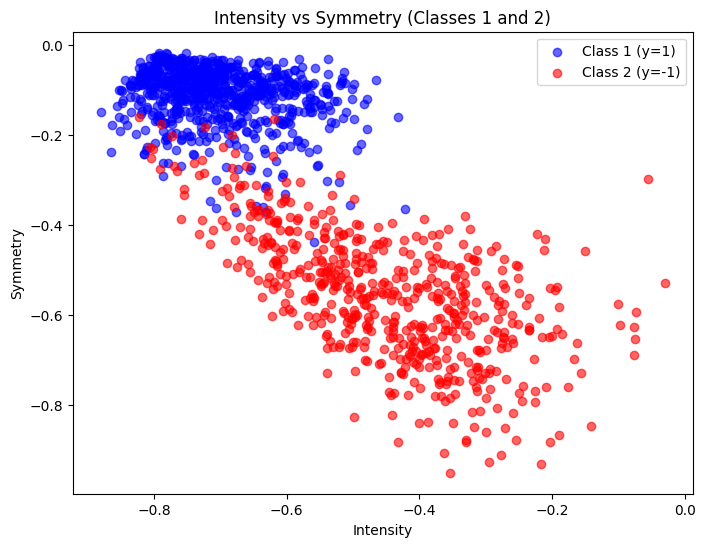

-----------------------------
Question 2(a,b,c)
Check GD, SGD
-----------------------------

METHOD: GRADIENT DESCENT
MODEL TRAINING STARTED.....
TRAINING SUCCESSFULLY COMPLETED!
No of seconds taken to execute :1.75
Updated weights:  [ 0.18761413  3.55944904 -2.06327285]
Accuracy : 0.9444

METHOD: STOCHASTIC GRADIENT DESCENT
MODEL TRAINING STARTED.....
TRAINING SUCCESSFULLY COMPLETED!
No of seconds taken to execute :1.69
Updated weights:  [10.59834209 32.13527771  2.00607358]
Accuracy : 0.9711
-----------------------------
Question 2(d)
Grid search hyper-parameters
-----------------------------
Training with learning rate = 0.1 and max_iter = 100

METHOD: STOCHASTIC GRADIENT DESCENT
MODEL TRAINING STARTED.....
TRAINING SUCCESSFULLY COMPLETED!
No of seconds taken to execute :1.78
Training accuracy = 0.9719
Validation accuracy = 0.9788

Training with learning rate = 0.1 and max_iter = 200

METHOD: STOCHASTIC GRADIENT DESCENT
MODEL TRAINING STARTED.....
TRAINING SUCCESSFULLY COMPLETED!
No

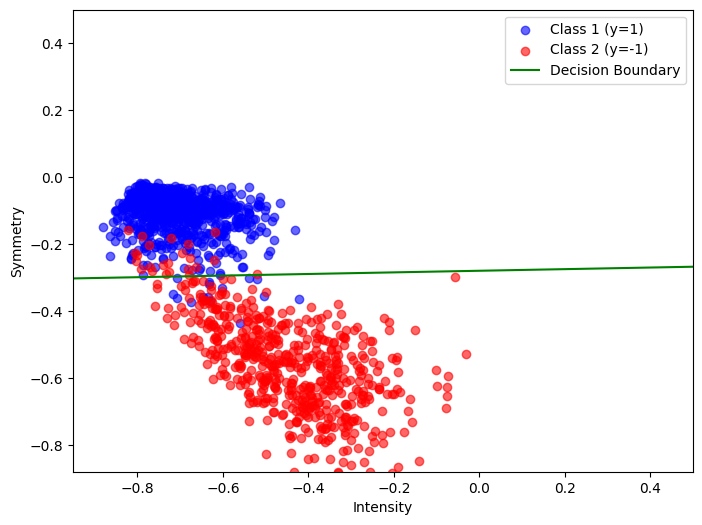

In [4]:
import os
import matplotlib.pyplot as plt

data_dir = ""
train_filename = "training.npz"
test_filename = "test.npz"


def visualize_features(X, y):
    '''This function is used to plot a 2-D scatter plot of training features.

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.

    Returns:
        No return. Save the plot to 'train_features.*' and include it
        in submission.
    '''
    ### YOUR CODE HERE
    class_1 = X[y == 1]
    class_2 = X[y == -1]

    plt.figure(figsize=(8, 6))
    plt.scatter(class_1[:, 1], class_1[:, 0], color='blue', label='Class 1 (y=1)', alpha=0.6)
    plt.scatter(class_2[:, 1], class_2[:, 0], color='red', label='Class 2 (y=-1)', alpha=0.6)

    plt.xlabel('Intensity')
    plt.ylabel('Symmetry')
    plt.title('Intensity vs Symmetry (Classes 1 and 2)')
    plt.legend()

    plt.savefig('train_features.png')

    plt.show()

    ### END YOUR CODE

def visualize_result(X, y, W):
    '''This function is used to plot the sigmoid model after training.

    Args:
        X: An array of shape [n_samples, 2].
        y: An array of shape [n_samples,]. Only contains 1 or -1.
        W: An array of shape [n_features,].

    Returns:
        No return. Save the plot to 'train_result_sigmoid.*' and include it
        in submission.
    '''
    ### YOUR CODE HERE
    class_1 = X[y == 1]
    class_2 = X[y == -1]

    plt.figure(figsize=(8, 6))
    plt.scatter(class_1[:, 1], class_1[:, 0], color='blue', label='Class 1 (y=1)', alpha=0.6)
    plt.scatter(class_2[:, 1], class_2[:, 0], color='red', label='Class 2 (y=-1)', alpha=0.6)

    plt.xlabel('Intensity')
    plt.ylabel('Symmetry')

    x1_min, x1_max = X[:, 0].min(), X[:, 0].max() + 1

    # Calculate the decision boundary: x2 = (-w_1 * x1 - b) / w_2
    x1_values = np.linspace(x1_min, x1_max, 100)
    x2_values = -(W[2] * x1_values + W[0]) / W[1]

    plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')

    plt.xlim(x1_min, 0.5)
    plt.ylim(X[:, 1].min(), 0.5)

    plt.legend()
    plt.savefig('best_model.png')

    plt.show()
    ### END YOUR CODE


def main():
    # ------------Data Preprocessing------------
    # Read data for training.

    raw_data, labels = load_data(os.path.join(data_dir, train_filename))
    raw_train, raw_valid, label_train, label_valid = train_valid_split(raw_data, labels, 2300)

    ##### Preprocess raw data to extract features
    train_X_all = prepare_X(raw_train)
    valid_X_all = prepare_X(raw_valid)
    ##### Preprocess labels for all data to 0,1,2 and return the idx for data from '1' and '2' class.
    train_y_all, train_idx = prepare_y(label_train)
    valid_y_all, val_idx = prepare_y(label_valid)

    ####### For binary case, only use data from '1' and '2'
    train_X = train_X_all[train_idx]
    train_y = train_y_all[train_idx]
    ####### Only use the first 1350 data examples for binary training.
    train_X = train_X[0:1350]
    train_y = train_y[0:1350]
    valid_X = valid_X_all[val_idx]
    valid_y = valid_y_all[val_idx]
    ####### set lables to  1 and -1. Here convert label '2' to '-1' which means we treat data '1' as postitive class.
    train_y[np.where(train_y==2)] = -1
    valid_y[np.where(valid_y==2)] = -1
    data_shape= train_y.shape[0]

    ## Visualize training data.
    print('-----------------------------')
    print('Question 1')
    print('Generate feature and save figure')
    print('-----------------------------')
    visualize_features(train_X[:, 1:3], train_y)


    # ------------Logistic Regression Sigmoid Case------------
    #### Check GD, SGD
    print('-----------------------------')
    print('Question 2(a,b,c)')
    print('Check GD, SGD')
    print('-----------------------------')
    logisticR_classifier = logistic_regression(learning_rate=0.5, max_iter=100)


    logisticR_classifier.fit_GD(train_X, train_y)
    print("Updated weights: ", logisticR_classifier.get_params())
    print("Accuracy :",logisticR_classifier.score(train_X, train_y))
    logisticR_classifier.fit_SGD(train_X, train_y)
    print("Updated weights: ", logisticR_classifier.get_params())
    print("Accuracy :",logisticR_classifier.score(train_X, train_y))


    # Explore different hyper-parameters.
    print('-----------------------------')
    print('Question 2(d)')
    print('Grid search hyper-parameters')
    print('-----------------------------')
    learning_rate = [ 0.1, 0.2, 0.5]
    max_iter = [100, 200]

    ### YOUR CODE HERE
    best_learning_rate = None
    best_iteration_number = None
    best_accuracy = 0
    best_logisticR = None

    for lr in learning_rate:
        for iters in max_iter:
            print(f"Training with learning rate = {lr} and max_iter = {iters}")

            model = logistic_regression(learning_rate=lr, max_iter=iters)

            model.fit_SGD(train_X, train_y)
            accuracy = model.score(train_X, train_y)
            print(f"Training accuracy = {accuracy}")

            accuracy = model.score(valid_X, valid_y)
            print(f"Validation accuracy = {accuracy}")
            print()

            if accuracy > best_accuracy:

                best_accuracy = accuracy
                best_learning_rate = lr
                best_iteration_number = iters
                best_logisticR = model

    # Output the best hyperparameters and accuracy
    print(f"Best Learning Rate: {best_learning_rate}")
    print(f"Best Iteration Number: {best_iteration_number}")
    print(f"Best Validation Accuracy: {best_accuracy}")

    ## END YOUR CODE

    # Visualize the your 'best' model after training.
    # visualize_result(train_X[:, 1:3], train_y, best_logisticR.get_params())
    print('-----------------------------')
    print('Question 2(e)')
    print('Visualize the best model and save figure')
    print('-----------------------------')

    ### YOUR CODE HERE
    visualize_result(train_X[:, 1:3], train_y, best_logisticR.get_params())

    ### END YOUR CODE

    # ------------End------------


if __name__ == '__main__':
    main()